In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess

In [2]:
tariffs = [40,50,60,70,80,90,100,110,120,130,140]

In [3]:
tariffs = [40,50,60,70,80,90,100,110,120,130,140]

for i in range(len(tariffs)):
    
    with open("EVCS_15_C1.gms","r") as f:
        list_of_lines = f.readlines()
    
    list_of_lines[8] = "power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /" + str(tariffs[i]) + "/\n"
    
    print(list_of_lines[8])
    
    with open("EVCS_15_C1.gms", "w") as f:
        f.writelines(list_of_lines)
        
    subprocess.run(["gams", "EVCS_15_C1.gms", "logOption", "2"])
    
    subprocess.run(["move", "EVCS_15_C1_results.db", "EVCS_15_C1_results" + str(tariffs[i]) + ".db"], shell = True)
    
    print(tariffs[i])

power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /40/

40
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /50/

50
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /60/

60
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /70/

70
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /80/

80
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /90/

90
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /100/

100
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /110/

110
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /120/

120
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /130/

130
power_fee_winter 'fee per max kW per month NOV-MAR NOK/kW' /140/

140


In [5]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_15_C1_results*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[18:-3]] = grid_power['level'].copy()
    grid_ex_p[filename[18:-3]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[18:-3]] = grid_total_power['level'].copy()
    
    grid_e[filename[18:-3]] = grid_energy['level'].copy()
    grid_ex_e[filename[18:-3]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[18:-3]] = ESS_level['level'].copy()
    ESS_p[filename[18:-3]] = ESS_power['level'].copy()  
    
    sclrs[filename[18:-3]] = scalars['level'].copy()
    
    soc_pen[filename[18:-3]] = soc_penalty['level'].copy()



In [7]:
#Scalar variables are collected in one DF. In this cell this df is cleaned and sorted

sclrs = sclrs.set_index(scalars['name'])
sclrs1 = sclrs.T
sclrs1['var_ESS_size'] = sclrs1['var_ESS_size'] * 1.25
sclrs1.index = sclrs1.index.astype(int)
sclrs1 = sclrs1.sort_index(ascending = True)
sclrs1['Power Tariff'] = np.array(tariffs)
sclrs1

name,var_ess_rated_power,var_grid_maxpower1,var_grid_maxpower2,var_grid_maxpower3,var_grid_maxpower4,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size,Power Tariff
40,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,43767.534808,3602.265477,4.283482,223438.638074,173.9625,40
50,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,52696.715808,3602.265477,4.283482,232367.819074,173.9625,50
60,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,61625.896808,3602.265477,4.283482,241297.000074,173.9625,60
70,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,70555.077808,3602.265477,4.283482,250226.181074,173.9625,70
80,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,79484.258808,3602.265477,4.283482,259155.362074,173.9625,80
90,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,88413.439808,3602.265477,4.283482,268084.543074,173.9625,90
100,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,97342.620808,3602.265477,4.283482,277013.724074,173.9625,100
110,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,106271.801808,3602.265477,4.283482,285942.905074,173.9625,110
120,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,115200.982808,3602.265477,4.283482,294872.086074,173.9625,120
130,173.9625,222.5975,264.8099,180.0032,225.5075,30617.4,141094.230769,124130.163808,3602.265477,4.283482,303801.267074,173.9625,130


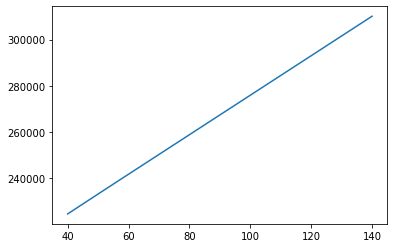

In [6]:
plt.plot(sclrs1['var_system_cost'])

Holy cow! With the battery fixed, the analysis is on how much it costs Glitre or Circle K if the grid tariff is changed. This is a linear correlation with an increase of 890 NOK for the four winter-months per 1 NOK increase in power tariff! The tariff is lower in the summer time however, should be included in the model in the future. But this means that the energystation at kongsbergporten is highly sensitive to changes in the grid tariff. If the tariff is increased by 5 NOK, from 70 to 75 NOK, that would cost the operator 4300 NOK, which isnt so bad actually haha. System costs would go from 250295 to 254600, a 1.7% increase 